<a href="https://colab.research.google.com/github/tyler999x/TuanAnh_Lab2_Regression/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
breast_cancer_dt = datasets.load_breast_cancer()
print(breast_cancer_dt.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

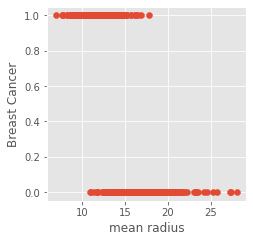

In [3]:
# Generate scatter plot pf independent vs Dependent variable
plt.style.use('ggplot')
fig = plt.figure(figsize= (25 , 25))

for index , feature_name in enumerate(breast_cancer_dt.feature_names):
    ax = fig.add_subplot(6, 6, index + 6) 
    ax.scatter(breast_cancer_dt.data[:, index], breast_cancer_dt.target) 
    ax.set_ylabel('Breast Cancer', size = 12) 
    ax.set_xlabel(feature_name, size = 12)
    plt.show() 

In [4]:
# Load the dataset into Pandas Dataframe 
breast_cancer_pd = pd.DataFrame(breast_cancer_dt.data) 
breast_cancer_pd.columns = breast_cancer_dt.feature_names 
breast_cancer_pd_target = np.asarray(breast_cancer_dt.target) 
breast_cancer_pd['Breast Cancer'] = pd.Series(breast_cancer_pd_target) 
  
# input  
X = breast_cancer_pd.iloc[:, :-1] 
  
#output 
Y = breast_cancer_pd.iloc[:, -1] 
  
print(breast_cancer_pd.head()) 

   mean radius  mean texture  ...  worst fractal dimension  Breast Cancer
0        17.99         10.38  ...                  0.11890              0
1        20.57         17.77  ...                  0.08902              0
2        19.69         21.25  ...                  0.08758              0
3        11.42         20.38  ...                  0.17300              0
4        20.29         14.34  ...                  0.07678              0

[5 rows x 31 columns]


In [5]:
x_train, x_test, y_train, y_test = train_test_split( 
    breast_cancer_pd.iloc[:, :-1], breast_cancer_pd.iloc[:, -1],  
    test_size = 0.25) 
  
print("Train data shape of X = % s and Y = % s : "%( 
    x_train.shape, y_train.shape)) 
  
print("Test data shape of X = % s and Y = % s : "%( 
    x_test.shape, y_test.shape)) 

Train data shape of X = (426, 30) and Y = (426,) : 
Test data shape of X = (143, 30) and Y = (143,) : 


In [6]:
# Apply multiple Linear Regression Model 
lreg = LinearRegression() 
lreg.fit(x_train, y_train) 
  
# Generate Prediction on test set 
lreg_y_pred = lreg.predict(x_test) 
  
# calculating Mean Squared Error (mse) 
mean_squared_error = np.mean((lreg_y_pred - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 
  
# Putting together the coefficient and their corrsponding variable names  
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = x_train.columns 
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_) 
print(lreg_coefficient) 

Mean squared Error on test set :  0.07266813007171799
                    Columns  Coefficient Estimate
0               mean radius              0.155946
1              mean texture             -0.005893
2            mean perimeter             -0.000360
3                 mean area             -0.000996
4           mean smoothness             -0.235801
5          mean compactness              3.965833
6            mean concavity             -1.493866
7       mean concave points             -2.539320
8             mean symmetry             -0.532273
9    mean fractal dimension             -1.999386
10             radius error             -0.186790
11            texture error             -0.032208
12          perimeter error              0.037793
13               area error             -0.000211
14         smoothness error            -13.780896
15        compactness error             -2.243849
16          concavity error              3.262157
17     concave points error            -11.885

In [7]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 
  
# Train the model  
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test) 
  
# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 
  
# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 

0.08312013679408867
                    Columns  Coefficient Estimate
0               mean radius              0.189689
1              mean texture             -0.004163
2            mean perimeter              0.006051
3                 mean area             -0.001720
4           mean smoothness             -0.146449
5          mean compactness             -0.014461
6            mean concavity             -0.307330
7       mean concave points             -0.226654
8             mean symmetry             -0.140236
9    mean fractal dimension             -0.018759
10             radius error             -0.227833
11            texture error             -0.059493
12          perimeter error              0.020137
13               area error              0.000579
14         smoothness error             -0.049642
15        compactness error              0.036868
16          concavity error              0.025015
17     concave points error             -0.039577
18           symmetry error   

In [8]:
# import Lasso regression from sklearn library 
from sklearn.linear_model import Lasso 
  
# Train the model 
lasso = Lasso(alpha = 1) 
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 
  
# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 
  
print(lasso_coeff)

Mean squared error on test set 0.11582466805395075
                    Columns  Coefficient Estimate
0               mean radius             -0.000000
1              mean texture             -0.000000
2            mean perimeter             -0.000000
3                 mean area              0.000025
4           mean smoothness             -0.000000
5          mean compactness             -0.000000
6            mean concavity             -0.000000
7       mean concave points             -0.000000
8             mean symmetry             -0.000000
9    mean fractal dimension             -0.000000
10             radius error             -0.000000
11            texture error             -0.000000
12          perimeter error             -0.000000
13               area error              0.000312
14         smoothness error             -0.000000
15        compactness error             -0.000000
16          concavity error             -0.000000
17     concave points error             -0.000000

In [9]:
# import model 
from sklearn.linear_model import ElasticNet 
  
# Train the model 
e_net = ElasticNet(alpha = 1) 
e_net.fit(x_train, y_train) 
  
# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(x_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 
  
e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = x_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

Mean Squared Error on test set 0.10326779482621257


,Columns,Coefficient Estimate
0,mean radius,-0.000000
1,mean texture,-0.000000
2,mean perimeter,-0.000000
3,mean area,0.000332
4,mean smoothness,-0.000000
5,mean compactness,-0.000000
6,mean concavity,-0.000000
7,mean concave points,-0.000000
8,mean symmetry,-0.000000
9,mean fractal dimension,-0.000000
